In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import dataset
there are 2 datasets
* train.csv
* test.csv

In [2]:
train_path = "/kaggle/input/titanic/train.csv"
test_path = "/kaggle/input/titanic/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Inspect the data

## train dataset

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age'>

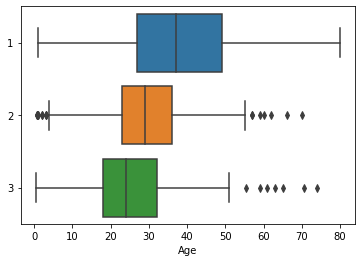

In [7]:
sns.boxplot(
    x = df_train["Age"], 
    y = pd.Categorical(df_train["Pclass"])
)

<AxesSubplot:xlabel='Fare'>

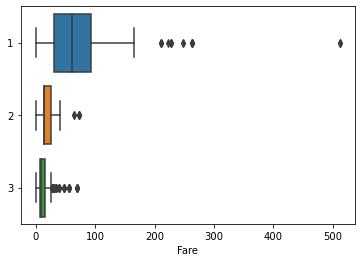

In [8]:
sns.boxplot(
    x = df_train["Fare"], 
    y = pd.Categorical(df_train["Pclass"])
)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

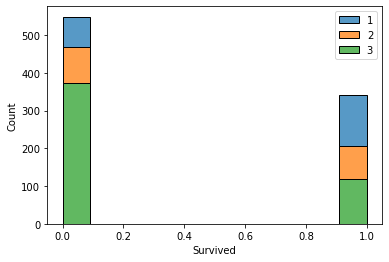

In [9]:
sns.histplot(
    x = df_train["Survived"],
    hue = pd.Categorical(df_train["Pclass"]),
    multiple = "stack"
)

In [10]:
df_train.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

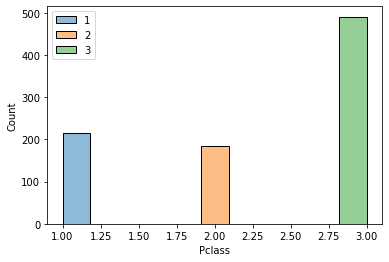

In [11]:
sns.histplot(
    x = df_train["Pclass"],
    hue = pd.Categorical(df_train["Pclass"])
)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

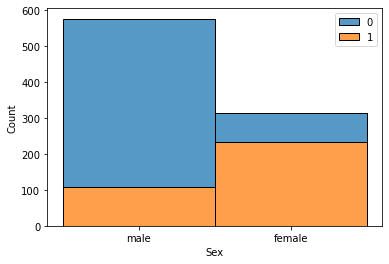

In [12]:
sns.histplot(
    x = df_train["Sex"],
    hue = pd.Categorical(df_train["Survived"]),
    multiple = "stack"
)

In [13]:
df_train["Pclass"] = pd.Categorical(df_train["Pclass"], ordered = True)

## test dataset

In [14]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Age       86
Fare       1
Cabin    327
dtype: int64

In [17]:
df_test["Pclass"] = pd.Categorical(df_test["Pclass"], ordered = True)

# Imputation
According to the age column in the dataset, it has so many NA values. To get rid of NA values, I will use the imputation technique. A simple technique that replaces NA with the mean value.

In [18]:
import math

avg_ages = {}
for i in range(df_train["Pclass"].max()):
    ages = df_train.loc[df_train["Pclass"] == i + 1, "Age"]
    avg_ages[i + 1] = math.floor(ages.mean())

In [19]:
avg_ages

{1: 38, 2: 29, 3: 25}

In [20]:
for i in range(df_train.shape[0]):
    if pd.isna(df_train.loc[i, "Age"]):
        df_train.loc[i, "Age"] = avg_ages[df_train.loc[i, "Pclass"]]

In [21]:
for i in range(df_test.shape[0]):
    if pd.isna(df_test.loc[i, "Age"]):
        df_test.loc[i, "Age"] = avg_ages[df_test.loc[i, "Pclass"]]

In [22]:
df_train.isna().sum()[df_train.isna().sum() > 0]

Cabin       687
Embarked      2
dtype: int64

In [23]:
df_test.isna().sum()[df_test.isna().sum() > 0]

Fare       1
Cabin    327
dtype: int64

# Prepare data for model training

In [24]:
df_train_class = df_train.copy()
df_test_class = df_test.copy()

In [25]:
cols = ["PassengerId", "Ticket", "Name", "Fare", "Embarked", "Cabin"]

df_train_class.drop(cols, axis = 1, inplace = True)
df_test_class.drop(cols, axis = 1, inplace = True)

In [26]:
df_train_class = pd.get_dummies(df_train_class)
X_test = pd.get_dummies(df_test_class)

In [27]:
df_train_class.head()

,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0
2,1,26.0,0,0,0,0,1,1,0
3,1,35.0,1,0,1,0,0,1,0
4,0,35.0,0,0,0,0,1,0,1


In [28]:
X_test.head()

,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,34.5,0,0,0,0,1,0,1
1,47.0,1,0,0,0,1,1,0
2,62.0,0,0,0,1,0,0,1
3,27.0,0,0,0,0,1,0,1
4,22.0,1,1,0,0,1,1,0


In [29]:
X = df_train_class.drop("Survived", axis = 1)
y = df_train_class["Survived"]

# Train and test
This problem is a binary classification problem. So, there are many methods commonly used for [binary classification](https://en.wikipedia.org/wiki/Binary_classification).

So, I decided to use some of the methods commonly used for binary classification
* [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)
* [Random forest](https://en.wikipedia.org/wiki/Random_forest)
* [Decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

*You could try more if you want to. Just have fun with it :)*

In [30]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [31]:
def score(res):
    return round(res * 100, 2)

## Logistic regression

In [32]:
model_lgr = LogisticRegression()
model_lgr.fit(X, y)
score_lgr = score(model_lgr.score(X, y))

## Random forest

In [33]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
score_rf = score(model_rf.score(X, y))

## Decision tree

In [34]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X, y)
score_dt = score(model_dt.score(X, y))

## Naive Bayes classifier

In [35]:
model_nb = GaussianNB()
model_nb.fit(X, y)
score_nb = score(model_nb.score(X, y))

# Conclusion

In [36]:
models = pd.DataFrame({
    "model": ["Logistic regression", "Random forest", "Decision tree", "Naive Bayes classifier"],
    "score": [score_lgr, score_rf, score_dt, score_nb]
})
models.sort_values(by = "score", ascending = False)

,model,score
1,Random forest,91.81
2,Decision tree,91.81
0,Logistic regression,80.70
3,Naive Bayes classifier,79.01


Decision tree and Random forest score the same. However, I will choose Random forest model. <br/>
Ref: https://www.statology.org/decision-tree-vs-random-forest/

# Submit

In [37]:
y_pred = model_rf.predict(X_test)

In [38]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Survived": y_pred
})

submission.to_csv("submission.csv", index = False)

In [39]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
